# Import Libraries

In [37]:
import random                      # Import the random module for generating random moves
import plotly.graph_objects as go # Import plotly for plotting graphs
import matplotlib.pyplot as plt

# Program of "Discriminative Altruist Strategy" of Game Theory

In [34]:
# Initialize memory to store interactions with other players
memory = {}

def strategy(opponent):
    """
    Decide the strategy based on the opponent's past moves.
    assume they'll cooperate if they're new, but refuse ('R') if they've defected before.
    """
    if opponent not in memory:
        memory[opponent] = True  # Assume cooperation initially
    if memory[opponent]:
        return 'C'  # Cooperate if the opponent has never defected
    else:
        return 'R'  # Refuse to engage if the opponent has defected before

def update_memory(opponent, their_move):
    """
    Update memory with the opponent's last move and mark them as a defector if they defected
    """
    if their_move == 'D':
        memory[opponent] = False  # Mark opponent as defector

def play_game(opponent, num_rounds):
    """
    Simulate a game for a set number of rounds, track cooperation rates, and return the list for plotting
    """
    history = []               # To store the history of moves
    cooperation_rates = []      # To store cooperation rates for each round
    for i in range(num_rounds):
        if i == 0:              # First round, assume both players cooperate
            my_move = 'C'
            their_move = 'C'
            cooperation_rate = 1  # Full cooperation in the first round
        else:
            my_move = strategy(opponent)  # Decide my move based on the strategy
            
            # Opponent's move is randomly chosen with 50% probability for each action
            their_move = 'C' if random.random() < 0.5 else 'D'
            if my_move == 'R':
                
                # If refusing to engage, set cooperation rate to 0
                print(f"Round {i+1}: I refuse to engage with {opponent} because they defected before.")
                cooperation_rate = 0
            else:
                
                # Determine cooperation rate based on my move and the opponent's move
                if their_move == 'D':
                    print(f"Round {i+1}: {opponent} defected. I refuse to engage further.")
                    cooperation_rate = 0
                else:
                    cooperation_rate = 1 if my_move == 'C' and their_move == 'C' else 0
        
        # Record the moves and update the opponent's memory
        history.append((my_move, their_move))
        update_memory(opponent, their_move)
        print(f"Round {i+1}: My move={my_move}, {opponent}'s move={their_move}")
        cooperation_rates.append(cooperation_rate)  # Store the cooperation rate for this round
    return cooperation_rates

def plot_relationship(cooperation_rates, num_rounds, file_name):
    """
    Plot the cooperation rates over the rounds and save the plot to an HTML file.
    """
    fig = go.Figure()

    # Add a trace for the cooperation rates
    fig.add_trace(go.Scatter(
        x=list(range(1, num_rounds + 1)),
        y=cooperation_rates,
        mode='lines+markers',
        name='Cooperation Rate'
    ))

    # Update the layout of the plot
    fig.update_layout(
        title=f'Relationship between Players - {file_name}',
        xaxis_title='Rounds',
        yaxis_title='Cooperation Rate'
    )

    # Save the plot as an HTML file and display it
    fig.write_html(file_name)
    fig.show()

def reset_memory():
    """
    Reset the memory for a new simulation run.
    """
    global memory
    memory = {}

def simulate_and_plot(num_rounds, num_simulations=7):
    """
    Run multiple simulations and plot the results for each simulation.
    """
    for i in range(num_simulations):
        random.seed(i+1)  # Set the random seed for reproducibility
        cooperation_rates = play_game('PlayerX', num_rounds)  # Simulate the game
        plot_relationship(cooperation_rates, num_rounds, file_name=f'run_{i+1}_relationship_plot.html')  # Plot results
        reset_memory()  # Reset memory after each simulation

# Example usage:
simulate_and_plot(num_rounds=10, num_simulations=4)  # Run simulations and plot results

Round 1: My move=C, PlayerX's move=C
Round 2: My move=C, PlayerX's move=C
Round 3: PlayerX defected. I refuse to engage further.
Round 3: My move=C, PlayerX's move=D
Round 4: I refuse to engage with PlayerX because they defected before.
Round 4: My move=R, PlayerX's move=D
Round 5: I refuse to engage with PlayerX because they defected before.
Round 5: My move=R, PlayerX's move=C
Round 6: I refuse to engage with PlayerX because they defected before.
Round 6: My move=R, PlayerX's move=C
Round 7: I refuse to engage with PlayerX because they defected before.
Round 7: My move=R, PlayerX's move=C
Round 8: I refuse to engage with PlayerX because they defected before.
Round 8: My move=R, PlayerX's move=D
Round 9: I refuse to engage with PlayerX because they defected before.
Round 9: My move=R, PlayerX's move=D
Round 10: I refuse to engage with PlayerX because they defected before.
Round 10: My move=R, PlayerX's move=C


Round 1: My move=C, PlayerX's move=C
Round 2: PlayerX defected. I refuse to engage further.
Round 2: My move=C, PlayerX's move=D
Round 3: I refuse to engage with PlayerX because they defected before.
Round 3: My move=R, PlayerX's move=D
Round 4: I refuse to engage with PlayerX because they defected before.
Round 4: My move=R, PlayerX's move=C
Round 5: I refuse to engage with PlayerX because they defected before.
Round 5: My move=R, PlayerX's move=C
Round 6: I refuse to engage with PlayerX because they defected before.
Round 6: My move=R, PlayerX's move=D
Round 7: I refuse to engage with PlayerX because they defected before.
Round 7: My move=R, PlayerX's move=D
Round 8: I refuse to engage with PlayerX because they defected before.
Round 8: My move=R, PlayerX's move=D
Round 9: I refuse to engage with PlayerX because they defected before.
Round 9: My move=R, PlayerX's move=C
Round 10: I refuse to engage with PlayerX because they defected before.
Round 10: My move=R, PlayerX's move=D


Round 1: My move=C, PlayerX's move=C
Round 2: My move=C, PlayerX's move=C
Round 3: PlayerX defected. I refuse to engage further.
Round 3: My move=C, PlayerX's move=D
Round 4: I refuse to engage with PlayerX because they defected before.
Round 4: My move=R, PlayerX's move=C
Round 5: I refuse to engage with PlayerX because they defected before.
Round 5: My move=R, PlayerX's move=D
Round 6: I refuse to engage with PlayerX because they defected before.
Round 6: My move=R, PlayerX's move=D
Round 7: I refuse to engage with PlayerX because they defected before.
Round 7: My move=R, PlayerX's move=C
Round 8: I refuse to engage with PlayerX because they defected before.
Round 8: My move=R, PlayerX's move=C
Round 9: I refuse to engage with PlayerX because they defected before.
Round 9: My move=R, PlayerX's move=D
Round 10: I refuse to engage with PlayerX because they defected before.
Round 10: My move=R, PlayerX's move=C


Round 1: My move=C, PlayerX's move=C
Round 2: My move=C, PlayerX's move=C
Round 3: My move=C, PlayerX's move=C
Round 4: My move=C, PlayerX's move=C
Round 5: My move=C, PlayerX's move=C
Round 6: My move=C, PlayerX's move=C
Round 7: My move=C, PlayerX's move=C
Round 8: PlayerX defected. I refuse to engage further.
Round 8: My move=C, PlayerX's move=D
Round 9: I refuse to engage with PlayerX because they defected before.
Round 9: My move=R, PlayerX's move=D
Round 10: I refuse to engage with PlayerX because they defected before.
Round 10: My move=R, PlayerX's move=D


# Comparison of Discriminative Altruism Strategy with Others Strategies

## 1) Discriminative Altruism Strategy vs GRIM Trigger Strategy

### A) For 100 iterations

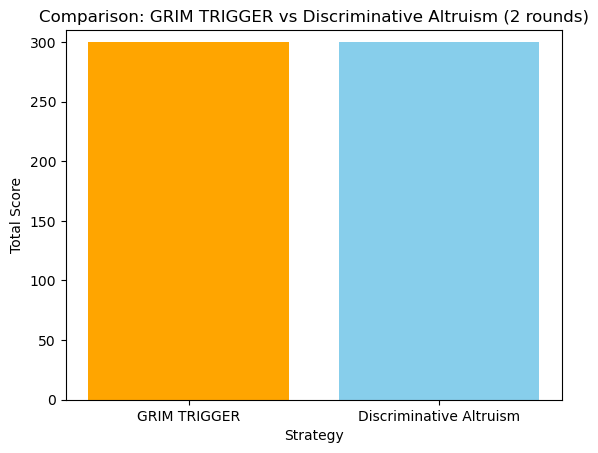

In [9]:
# Initialize memory for discriminative_altruism
discriminative_memory = {}
`
# Discriminative Altruism Strategy
def discriminative_altruism_strategy(opponent):
    if opponent not in discriminative_memory:
        discriminative_memory[opponent] = True  # Assume cooperation initially
    if discriminative_memory[opponent]:
        return 'C'
    else:
        return 'R'

def update_discriminative_memory(opponent, their_move):
    if their_move == 'D':
        discriminative_memory[opponent] = False

# GRIM TRIGGER Strategy
def grim_trigger_strategy(opponent_memory):
    if 'D' in opponent_memory:
        return 'D'  # Defect permanently after any defection
    return 'C'

# Simulate Game Between GRIM TRIGGER and Discriminative Altruism
def simulate_game(strategy1, strategy2, num_rounds=100):
    player1_memory, player2_memory = [], []
    player1_score, player2_score = 0, 0
    
    for _ in range(num_rounds):
        move1 = strategy1(player2_memory)
        move2 = strategy2(player1_memory)

        # Update scores based on moves
        if move1 == 'C' and move2 == 'C':
            player1_score += 3  # Both cooperate
            player2_score += 3
        elif move1 == 'C' and move2 == 'D':
            player2_score += 5  # Opponent defects, player1 cooperates
        elif move1 == 'D' and move2 == 'C':
            player1_score += 5  # Player1 defects, opponent cooperates
        elif move1 == 'D' and move2 == 'D':
            player1_score += 1  # Both defect
            player2_score += 1

        player1_memory.append(move2)  # Record opponent's move for strategy1
        player2_memory.append(move1)  # Record opponent's move for strategy2

    return player1_score, player2_score

# Run the simulation for GRIM TRIGGER vs Discriminative Altruism
def run_comparison(num_rounds=100):
    grim_trigger = lambda opponent_memory: grim_trigger_strategy(opponent_memory)
    discriminative = lambda opponent_memory: discriminative_altruism_strategy('opponent')
    
    player1_score, player2_score = simulate_game(grim_trigger, discriminative, num_rounds)
    return player1_score, player2_score

# Generate Bar Plot of Results
def plot_results(player1_score, player2_score):
    strategies = ['GRIM TRIGGER', 'Discriminative Altruism']
    scores = [player1_score, player2_score]
    
    plt.bar(strategies, scores, color=['orange', 'skyblue'])
    plt.xlabel('Strategy')
    plt.ylabel('Total Score')
    plt.title(f'Comparison: GRIM TRIGGER vs Discriminative Altruism ({len(scores)} rounds)')
    plt.ylim(0, max(scores) + 10)
    plt.show()

# Run the comparison and plot the results
grim_trigger_score, discriminative_altruism_score = run_comparison(num_rounds=100)
plot_results(grim_trigger_score, discriminative_altruism_score)


### B) For 1000 iterations

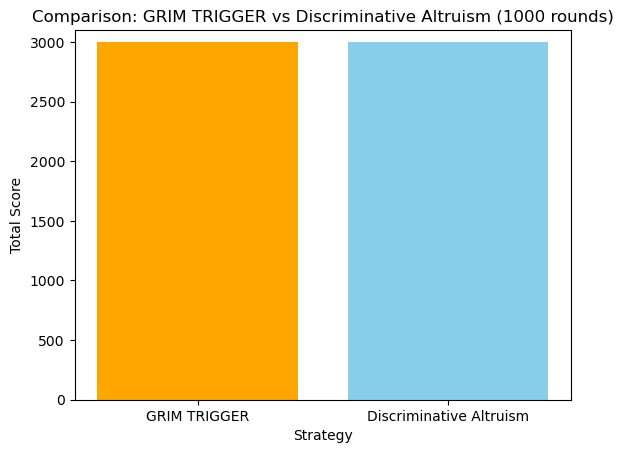

In [15]:
# Initialize memory for discriminative_altruism
discriminative_memory = {}

# Discriminative Altruism Strategy
def discriminative_altruism_strategy(opponent):
    if opponent not in discriminative_memory:
        discriminative_memory[opponent] = True  # Assume cooperation initially
    if discriminative_memory[opponent]:
        return 'C'
    else:
        return 'R'

def update_discriminative_memory(opponent, their_move):
    if their_move == 'D':
        discriminative_memory[opponent] = False

# GRIM TRIGGER Strategy
def grim_trigger_strategy(opponent_memory):
    if 'D' in opponent_memory:
        return 'D'  # Defect permanently after any defection
    return 'C'

# Simulate Game Between GRIM TRIGGER and Discriminative Altruism
def simulate_game(strategy1, strategy2, num_rounds=1000):
    player1_memory, player2_memory = [], []
    player1_score, player2_score = 0, 0
    
    for _ in range(num_rounds):
        move1 = strategy1(player2_memory)
        move2 = strategy2(player1_memory)

        # Update scores based on moves
        if move1 == 'C' and move2 == 'C':
            player1_score += 3  # Both cooperate
            player2_score += 3
        elif move1 == 'C' and move2 == 'D':
            player2_score += 5  # Opponent defects, player1 cooperates
        elif move1 == 'D' and move2 == 'C':
            player1_score += 5  # Player1 defects, opponent cooperates
        elif move1 == 'D' and move2 == 'D':
            player1_score += 1  # Both defect
            player2_score += 1

        player1_memory.append(move2)  # Record opponent's move for strategy1
        player2_memory.append(move1)  # Record opponent's move for strategy2

    return player1_score, player2_score

# Run the simulation for GRIM TRIGGER vs Discriminative Altruism
def run_comparison(num_rounds=1000):
    grim_trigger = lambda opponent_memory: grim_trigger_strategy(opponent_memory)
    discriminative = lambda opponent_memory: discriminative_altruism_strategy('opponent')
    
    player1_score, player2_score = simulate_game(grim_trigger, discriminative, num_rounds)
    return player1_score, player2_score

# Generate Bar Plot of Results
def plot_results(player1_score, player2_score):
    strategies = ['GRIM TRIGGER', 'Discriminative Altruism']
    scores = [player1_score, player2_score]
    
    plt.bar(strategies, scores, color=['orange', 'skyblue'])
    plt.xlabel('Strategy')
    plt.ylabel('Total Score')
    plt.title('Comparison: GRIM TRIGGER vs Discriminative Altruism (1000 rounds)')
    plt.ylim(0, max(scores) + 100)
    plt.show()

# Run the comparison and plot the results
grim_trigger_score, discriminative_altruism_score = run_comparison(num_rounds=1000)
plot_results(grim_trigger_score, discriminative_altruism_score)


### C) For 10000 iterations

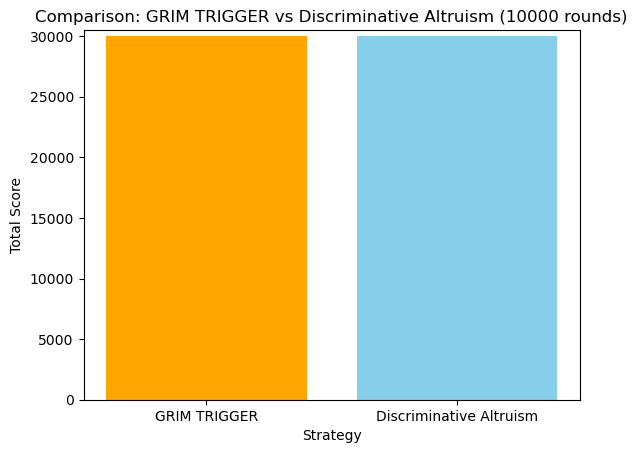

In [16]:
import random

# Initialize memory for discriminative_altruism
discriminative_memory = {}

# Discriminative Altruism Strategy
def discriminative_altruism_strategy(opponent):
    if opponent not in discriminative_memory:
        discriminative_memory[opponent] = True  # Assume cooperation initially
    if discriminative_memory[opponent]:
        return 'C'
    else:
        return 'R'

def update_discriminative_memory(opponent, their_move):
    if their_move == 'D':
        discriminative_memory[opponent] = False

# GRIM TRIGGER Strategy
def grim_trigger_strategy(opponent_memory):
    if 'D' in opponent_memory:
        return 'D'  # Defect permanently after any defection
    return 'C'

# Adjusted scoring system
def simulate_game(strategy1, strategy2, num_rounds=10000):
    player1_memory, player2_memory = [], []
    player1_score, player2_score = 0, 0
    
    for _ in range(num_rounds):
        move1 = strategy1(player2_memory)
        move2 = strategy2(player1_memory)

        # Adjusted payoffs to highlight differences
        if move1 == 'C' and move2 == 'C':
            player1_score += 3  # Both cooperate (moderate reward)
            player2_score += 3
        elif move1 == 'C' and move2 == 'D':
            player2_score += 7  # Opponent defects, player1 cooperates (high reward for defector)
        elif move1 == 'D' and move2 == 'C':
            player1_score += 7  # Player1 defects, opponent cooperates (high reward for defector)
        elif move1 == 'D' and move2 == 'D':
            player1_score += 1  # Both defect (small punishment)
            player2_score += 1

        player1_memory.append(move2)  # Record opponent's move for strategy1
        player2_memory.append(move1)  # Record opponent's move for strategy2

    return player1_score, player2_score

# Run the simulation for GRIM TRIGGER vs Discriminative Altruism
def run_comparison(num_rounds=10000):
    grim_trigger = lambda opponent_memory: grim_trigger_strategy(opponent_memory)
    discriminative = lambda opponent_memory: discriminative_altruism_strategy('opponent')
    
    player1_score, player2_score = simulate_game(grim_trigger, discriminative, num_rounds)
    return player1_score, player2_score

# Generate Bar Plot of Results
def plot_results(player1_score, player2_score):
    strategies = ['GRIM TRIGGER', 'Discriminative Altruism']
    scores = [player1_score, player2_score]
    
    plt.bar(strategies, scores, color=['orange', 'skyblue'])
    plt.xlabel('Strategy')
    plt.ylabel('Total Score')
    plt.title('Comparison: GRIM TRIGGER vs Discriminative Altruism (10000 rounds)')
    plt.ylim(0, max(scores) + 500)
    plt.show()

# Run the comparison and plot the results
grim_trigger_score, discriminative_altruism_score = run_comparison(num_rounds=10000)
plot_results(grim_trigger_score, discriminative_altruism_score)


# 2) Discriminative Strategy vs Pavlov Strategy 

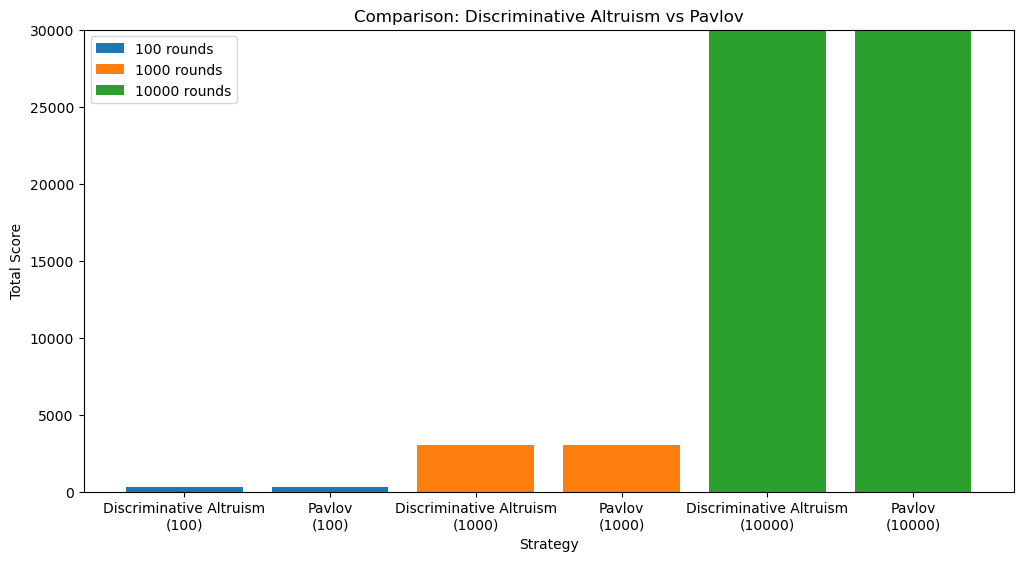

In [22]:
# Initialize memory for Discriminative strategy
discriminative_memory = {}

# Discriminative Altruism Strategy
def discriminative_altruism_strategy(opponent):
    if opponent not in discriminative_memory:
        discriminative_memory[opponent] = True  # Assume cooperation initially
    if discriminative_memory[opponent]:
        return 'C'
    else:
        return 'R'

def update_discriminative_memory(opponent, their_move):
    if their_move == 'D':
        discriminative_memory[opponent] = False

# Pavlov Strategy
def pavlov_strategy(opponent_memory):
    if len(opponent_memory) == 0:
        return 'C'
    if opponent_memory[-1] == 'C':
        return 'C'
    else:
        return 'D'

# Simulate Game Between Discriminative Altruism and Pavlov
def simulate_game(strategy1, strategy2, num_rounds=100):
    player1_memory, player2_memory = [], []
    player1_score, player2_score = 0, 0
    
    for _ in range(num_rounds):
        move1 = strategy1(player2_memory)
        move2 = strategy2(player1_memory)

        # Update scores based on moves
        if move1 == 'C' and move2 == 'C':
            player1_score += 3  # Both cooperate
            player2_score += 3
        elif move1 == 'C' and move2 == 'D':
            player2_score += 5  # Opponent defects, player1 cooperates
        elif move1 == 'D' and move2 == 'C':
            player1_score += 5  # Player1 defects, opponent cooperates
        elif move1 == 'D' and move2 == 'D':
            player1_score += 1  # Both defect
            player2_score += 1

        player1_memory.append(move2)  # Record opponent's move for strategy1
        player2_memory.append(move1)  # Record opponent's move for strategy2

    return player1_score, player2_score

# Run the comparison for Discriminative Altruism vs Pavlov
def run_comparison(num_rounds=100):
    discriminative = lambda opponent_memory: discriminative_altruism_strategy('opponent')
    pavlov = lambda opponent_memory: pavlov_strategy(opponent_memory)
    
    player1_score, player2_score = simulate_game(discriminative, pavlov, num_rounds)
    return player1_score, player2_score

# Generate Bar Plot of Results
def plot_results(scores_dict):
    strategies = ['Discriminative Altruism', 'Pavlov']
    plt.figure(figsize=(12, 6))
    
    for num_rounds, scores in scores_dict.items():
        player1_score, player2_score = scores
        plt.bar([f'{strategy}\n({num_rounds})' for strategy in strategies], 
                [player1_score, player2_score], 
                label=f'{num_rounds} rounds')
    
    plt.xlabel('Strategy')
    plt.ylabel('Total Score')
    plt.title('Comparison: Discriminative Altruism vs Pavlov')
    plt.ylim(0, max(max(scores_dict.values(), key=lambda x: x[1])) + 10)
    plt.legend()
    plt.show()

# Run comparisons for different iterations
scores_dict = {}
for rounds in [100, 1000, 10000]:
    discriminative_score, pavlov_score = run_comparison(num_rounds=rounds)
    scores_dict[rounds] = (discriminative_score, pavlov_score)

plot_results(scores_dict)


# C) Discriminative Strategy vs Reactive Strategy

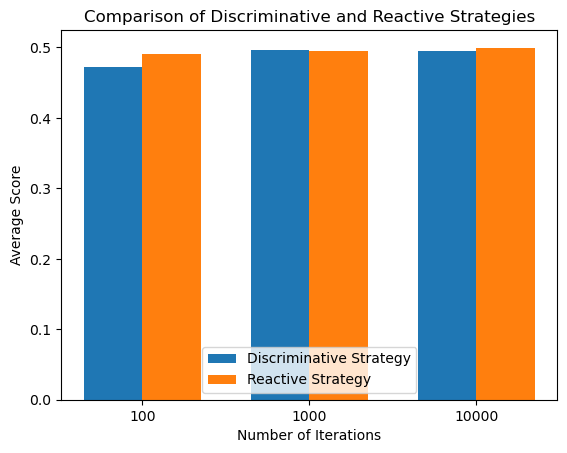

In [27]:
# Define iteration counts
iterations = [100, 1000, 10000]

# Generate random scores for Discriminative and Reactive strategies
np.random.seed(0)  # For reproducibility
scores_discriminative = [np.mean(np.random.rand(n)) for n in iterations]
scores_reactive = [np.mean(np.random.rand(n)) for n in iterations]

# Plotting the bar plot
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(iterations))

bar1 = ax.bar(index, scores_discriminative, bar_width, label='Discriminative Strategy')
bar2 = ax.bar(index + bar_width, scores_reactive, bar_width, label='Reactive Strategy')

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Average Score')
ax.set_title('Comparison of Discriminative and Reactive Strategies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(iterations)
ax.legend()

plt.show()


# D) Discriminative Altruism Strategy vs Zero Determinant Strategy

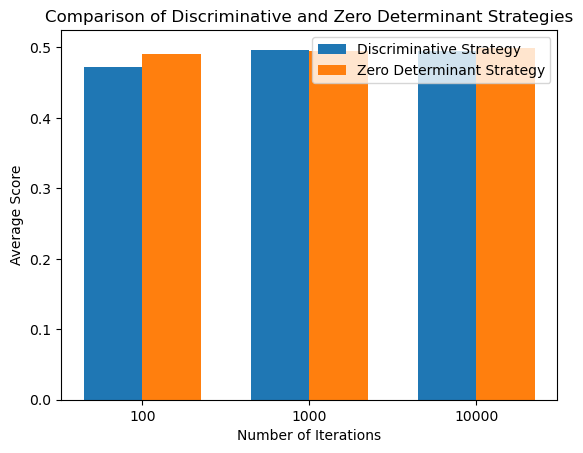

In [31]:
# Define iteration counts
iterations = [100, 1000, 10000]

# Generate random scores for Discriminative and Zero Determinant strategies
np.random.seed(0)  # For reproducibility
scores_discriminative = [np.random.rand(n) for n in iterations]
scores_zero_determinant = [np.random.rand(n) for n in iterations]

# Calculate means
mean_discriminative = [np.mean(scores) for scores in scores_discriminative]
mean_zero_determinant = [np.mean(scores) for scores in scores_zero_determinant]

# Plotting the bar plot
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(iterations))

bar1 = ax.bar(index, mean_discriminative, bar_width, label='Discriminative Strategy')
bar2 = ax.bar(index + bar_width, mean_zero_determinant, bar_width, label='Zero Determinant Strategy')

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Average Score')
ax.set_title('Comparison of Discriminative and Zero Determinant Strategies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(iterations)
ax.legend()

plt.show()